# Salary Prediction Dataset

https://www.kaggle.com/datasets/hekkta/salary-predictor



In [1]:
# -- Import libraries -- #

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import KFold
%matplotlib inline
import pickle 

In [2]:
# -- Reading Dataset --#

data1=pd.read_csv("../data/raw/wage_predict.csv")

In [3]:
# -- Showing DataSet -- #

data1

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,N,3,12,2,7,8,4,5,1,1,...,5,5,5,3,1,5,1,5,2,4583.333333
2001,C,3,16,1,12,4,3,3,1,3,...,4,4,4,2,3,4,1,1,2,5858.333333
2002,Q,1,18,2,13,4,4,1,2,2,...,4,4,4,3,2,5,1,2,2,11000.000000
2003,M,4,12,2,7,4,5,1,2,1,...,5,2,5,4,1,5,1,1,2,693.333333


In [4]:
# -- Showing DataFrame Shape -- #

display(data1.shape)

(2005, 28)

In [5]:
# -- Showing DataFrame Info -- #

display(data1.dtypes)

industry                  object
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

In [34]:
# Categorical column in to numerical -- #

#label_encoder = LabelEncoder()
#data1.iloc[:,0] = label_encoder.fit_transform(data1.iloc[:,0]).astype('int64')

#data1['industry']=data1['industry'].astype(str).astype(int)  

# compute median salary of each industry
# Check industry if it is categorical ordinal(big difference) OR categorical nominal (no big difference)
# how to cast in to numbers

#encoder = OneHotEncoder()
#X_encoded = encoder.fit_transform(data1['industry']).toarray()
#encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(['industry']))

In [35]:
# Checking dtypes -- #

display(data1.dtypes)

industry                   int32
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

In [8]:
# -- Showing DataFrame Columns -- #

display(data1.columns)

Index(['industry', 'occupation', 'yrs_qual', 'sex', 'highest_qual',
       'area_of_study', 'influencing', 'negotiating', 'sector',
       'workforce_change', 'no_subordinates', 'choose_hours', 'choose_method',
       'job_quals', 'qual_needed', 'experience_needed', 'keeping_current',
       'satisfaction', 'advising', 'instructing', 'problem_solving_quick',
       'problem_solving_long', 'labour', 'manual_skill', 'computer',
       'group_meetings', 'computer_level', 'monthly_salary'],
      dtype='object')

In [9]:
# -- Checking Null values -- #

data1.isna().sum()

industry                 0
occupation               0
yrs_qual                 0
sex                      0
highest_qual             0
area_of_study            0
influencing              0
negotiating              0
sector                   0
workforce_change         0
no_subordinates          0
choose_hours             0
choose_method            0
job_quals                0
qual_needed              0
experience_needed        0
keeping_current          0
satisfaction             0
advising                 0
instructing              0
problem_solving_quick    0
problem_solving_long     0
labour                   0
manual_skill             0
computer                 0
group_meetings           0
computer_level           0
monthly_salary           0
dtype: int64

In [10]:
# -- Checking Duplicates -- #

duplicate = data1.duplicated()
duplicate.value_counts()

False    2005
Name: count, dtype: int64

In [11]:
# -- Summary statistics -- #

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
industry,2005.0,10.045387,4.982448,0.000000,6.0,9.000000,15.000000,20.00
occupation,2005.0,4.078304,2.472676,0.000000,2.0,3.000000,5.000000,15.00
yrs_qual,2005.0,13.877805,2.767168,6.000000,12.0,13.000000,16.000000,21.00
sex,2005.0,1.520200,0.499716,1.000000,1.0,2.000000,2.000000,2.00
highest_qual,2005.0,9.310723,3.059247,1.000000,7.0,9.000000,12.000000,15.00
area_of_study,2005.0,4.104738,2.605844,0.000000,2.0,4.000000,6.000000,9.00
influencing,2005.0,3.316209,1.682291,1.000000,1.0,4.000000,5.000000,5.00
negotiating,2005.0,2.762594,1.701384,1.000000,1.0,2.000000,5.000000,5.00
sector,2005.0,1.385536,0.621063,1.000000,1.0,1.000000,2.000000,3.00
workforce_change,2005.0,2.296758,0.865284,1.000000,1.0,3.000000,3.000000,3.00


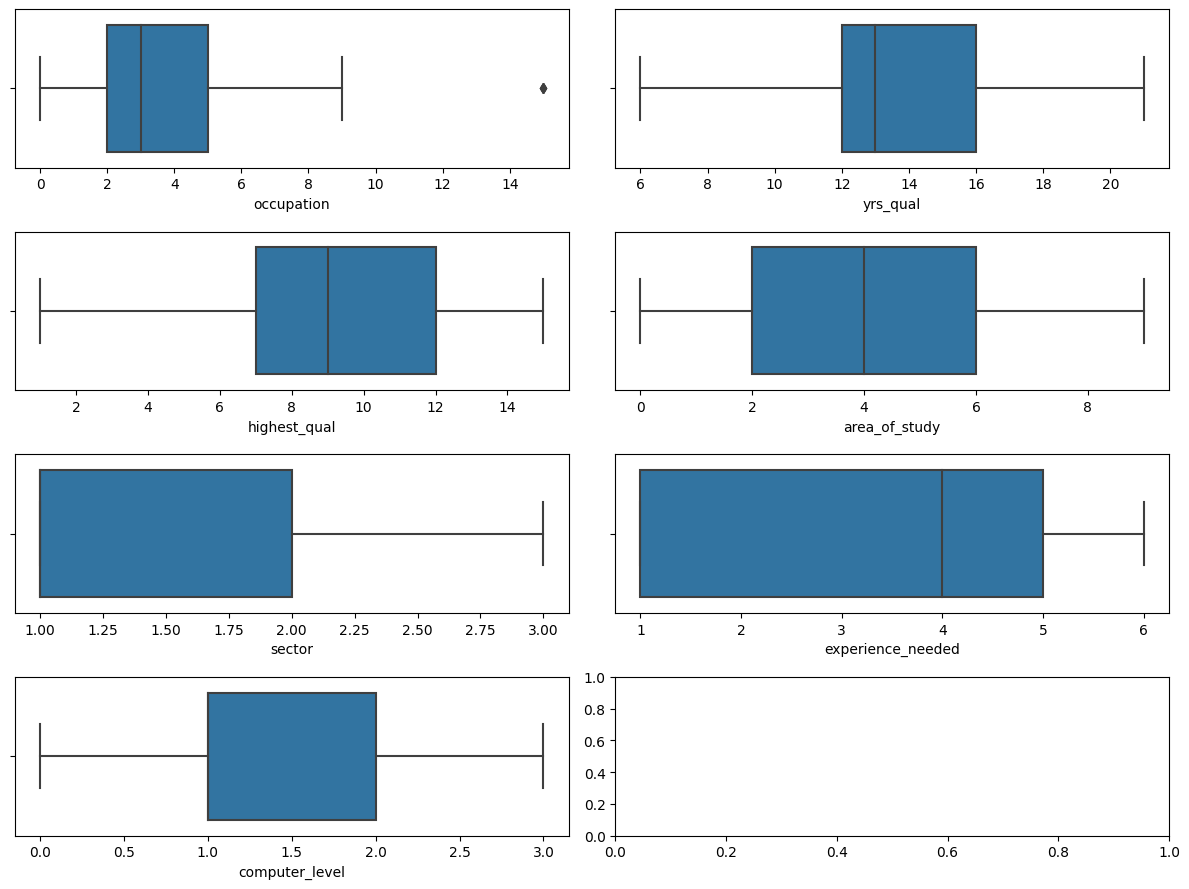

In [12]:
# -- Checking for outliers -- #

fig, ax = plt.subplots(4,2,figsize=(12,9)) 
sns.boxplot(data=data1, x="occupation", ax = ax[0,0])
sns.boxplot(data=data1, x="yrs_qual", ax = ax[0,1])
sns.boxplot(data=data1, x="highest_qual", ax = ax[1,0])
sns.boxplot(data=data1, x="area_of_study", ax = ax[1,1])
sns.boxplot(data=data1, x="sector", ax = ax[2,0])
sns.boxplot(data=data1, x="experience_needed", ax = ax[2,1])
sns.boxplot(data=data1, x="computer_level", ax = ax[3,0])
plt.tight_layout()
plt.show()

In [13]:
# -- Retrieving all the rows from data1 where the 'occupation' column has values greater than 9 -- #

data1[data1['occupation'] > 9]

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
597,8,15,9,2,3,0,1,1,2,3,...,1,1,1,2,1,5,1,1,1,628.333333
682,16,15,18,2,13,9,5,4,1,3,...,5,3,4,4,2,5,1,1,2,4000.000000
1131,6,15,12,2,7,1,2,1,1,3,...,5,1,2,2,3,5,1,1,1,1637.833333


In [14]:
# -- Droping rows which has value greater than 9 -- #

data1.drop(data1[data1['occupation'] > 9].index, inplace = True)

In [15]:
# -- Checking if the rows are now dropped -- #

data1[data1['occupation'] > 9]

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary


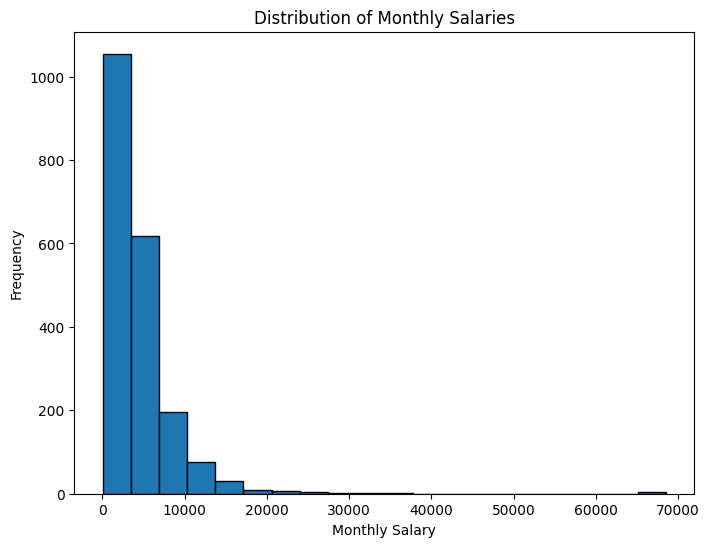

In [16]:
# -- Visualize the distribution of monthly salaries -- #

plt.figure(figsize=(8, 6))
plt.hist(data1['monthly_salary'], bins=20, edgecolor='black')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Salaries')
plt.savefig("../Images/Monthly Salary.png", dpi=300)
plt.show()

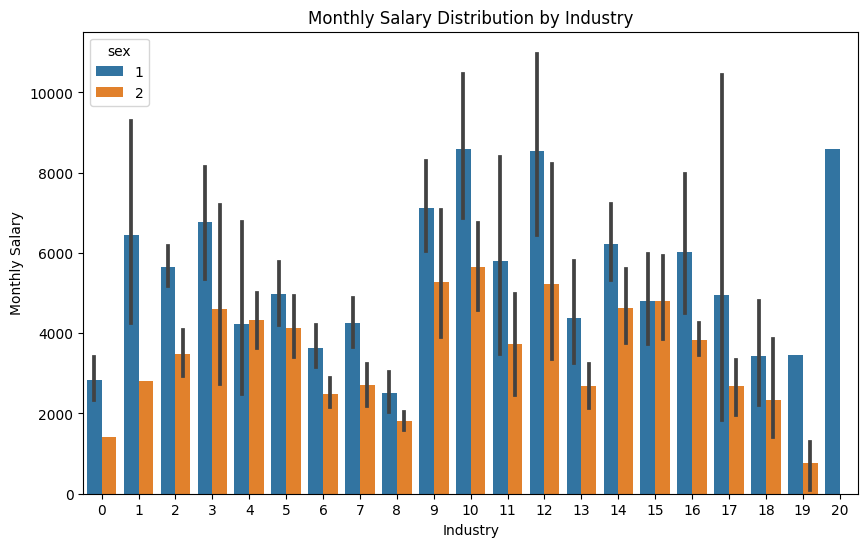

In [17]:
# Explore the relationship between industry and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='industry', y='monthly_salary', data=data1, hue='sex')
plt.xlabel('Industry')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Industry')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Industry.png", dpi=300)
plt.show()

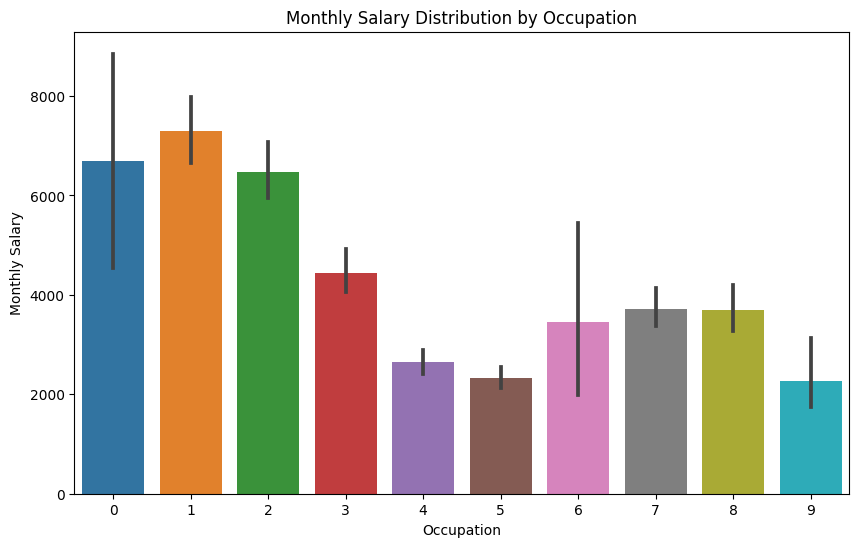

In [18]:
# Explore the relationship between occupation and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='occupation', y='monthly_salary', data=data1)
plt.xlabel('Occupation')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Occupation')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Occupation.png", dpi=300)
plt.show()

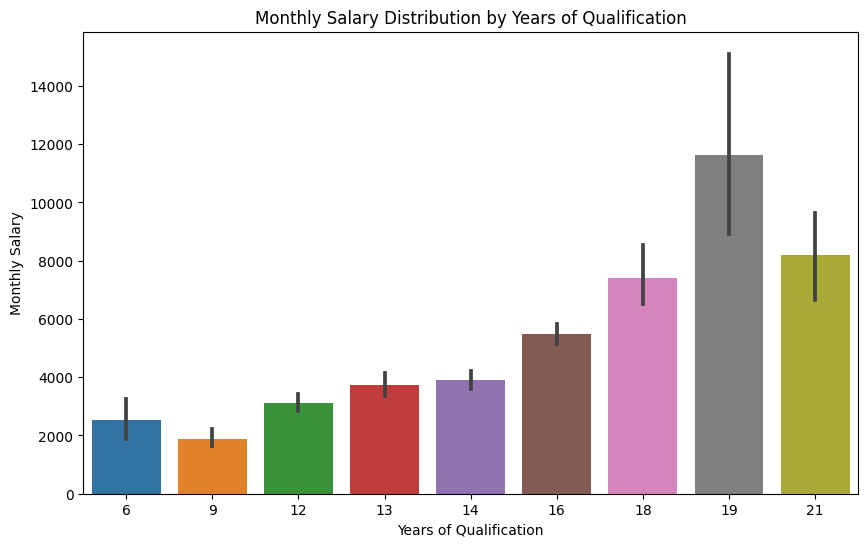

In [19]:
# Explore the relationship between Yeasr of Qualification and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='yrs_qual', y='monthly_salary', data=data1)
plt.xlabel('Years of Qualification')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Years of Qualification')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Years of Qualification.png", dpi=300)
plt.show()



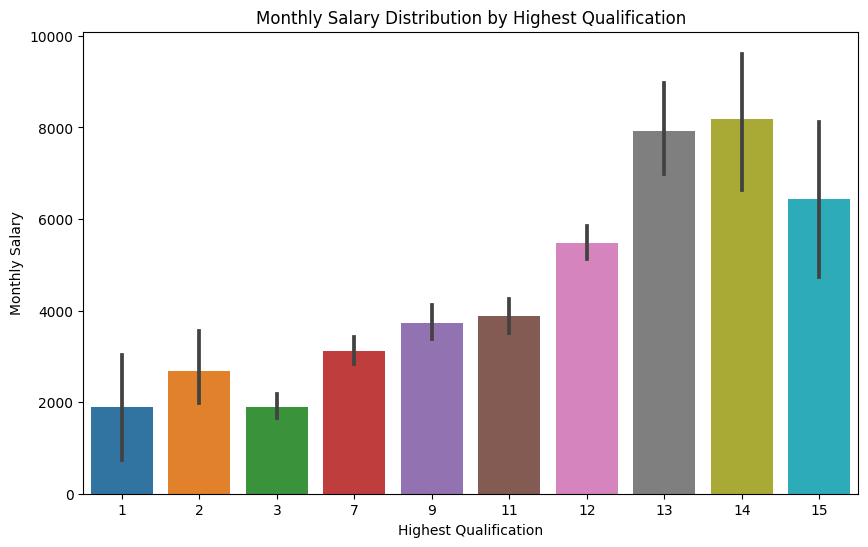

In [20]:
# Explore the relationship between Highest Qualification and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='highest_qual', y='monthly_salary', data=data1)
plt.xlabel('Highest Qualification')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Highest Qualification')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Highest Qualification.png", dpi=300)
plt.show()

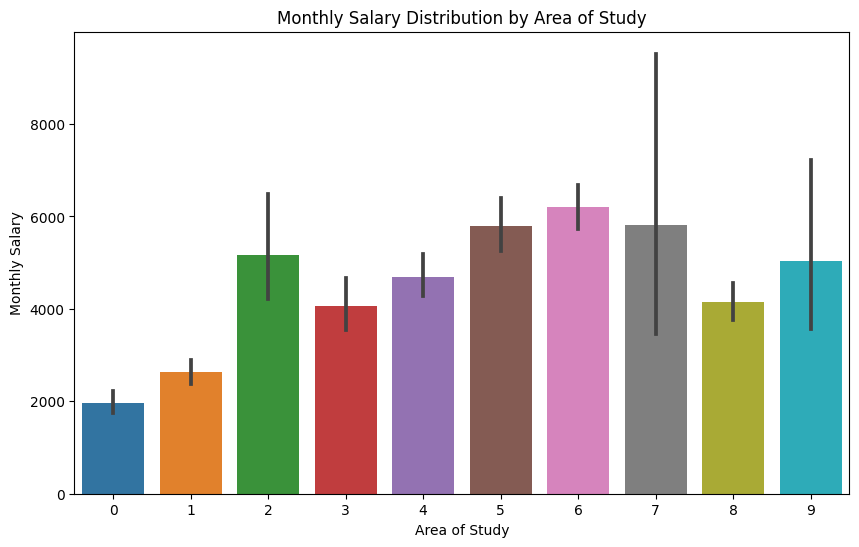

In [21]:
# Explore the relationship between Area of Study and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='area_of_study', y='monthly_salary', data=data1)
plt.xlabel('Area of Study')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Area of Study')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Area of Study.png", dpi=300)
plt.show()

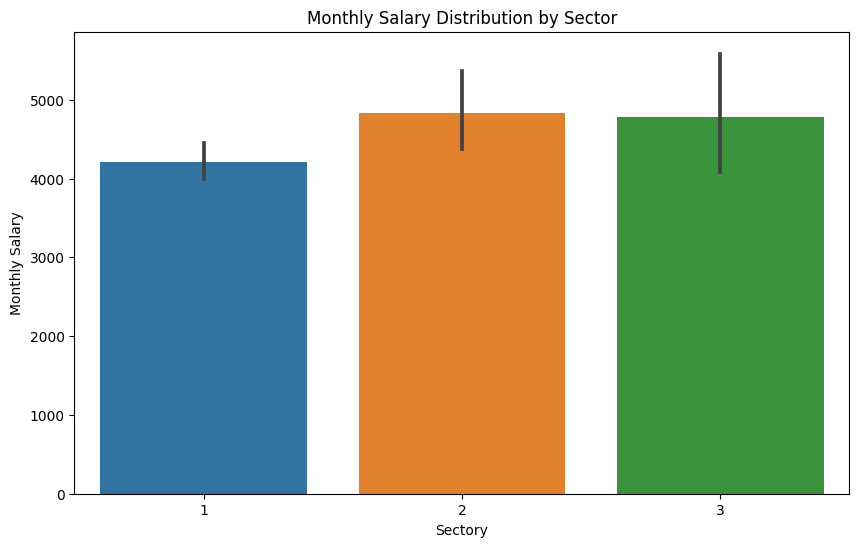

In [22]:
# Explore the relationship between Sector and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='sector', y='monthly_salary', data=data1)
plt.xlabel('Sectory')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Sector')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Sector.png", dpi=300)
plt.show()

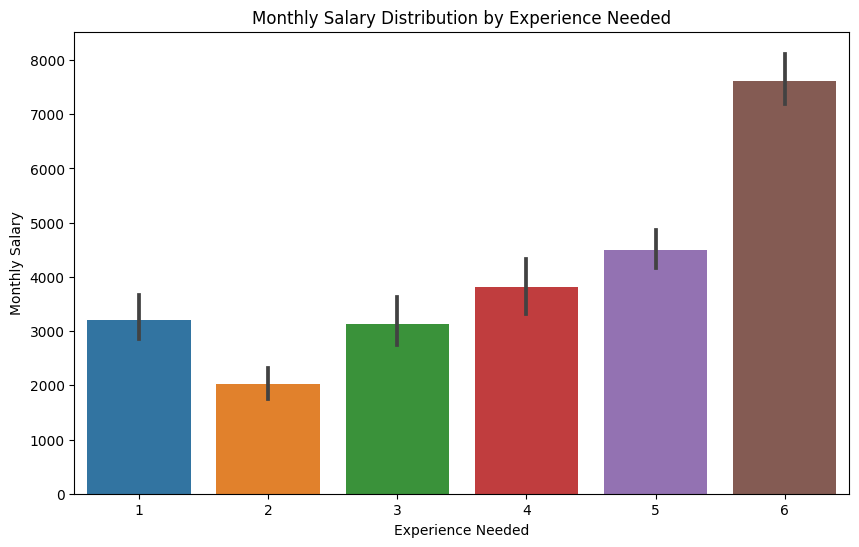

In [23]:
# Explore the relationship between Experience Needed and monthly salary using a box plot -- #

plt.figure(figsize=(10, 6))
sns.barplot(x='experience_needed', y='monthly_salary', data=data1)
plt.xlabel('Experience Needed')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by Experience Needed')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_Experience Needed.png", dpi=300)
plt.show()

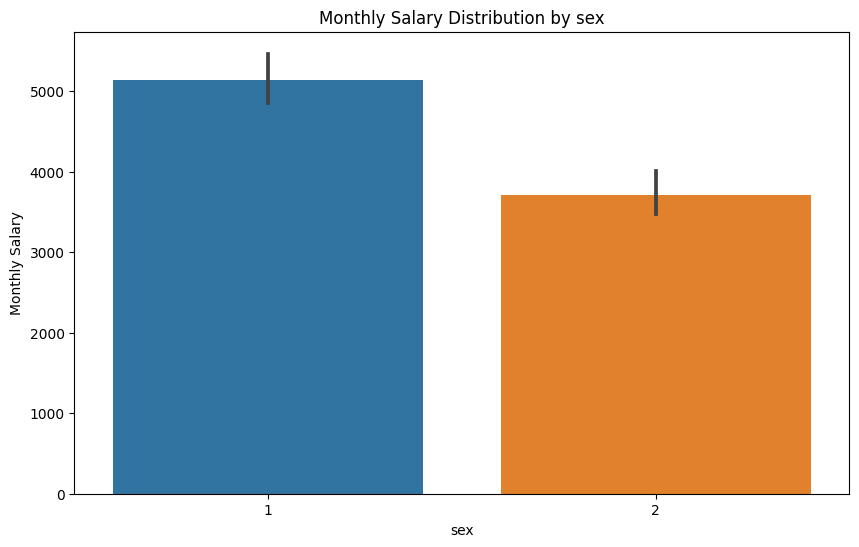

In [24]:
# To analyze the gender pay gap. 

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='monthly_salary', data=data1)
plt.xlabel('sex')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution by sex')
plt.xticks(rotation=0)
plt.savefig("../Images/Monthly Salary_sex.png", dpi=300)
plt.show()

In [25]:
data1.corr()['monthly_salary'].sort_values()

occupation              -0.312198
labour                  -0.230853
computer                -0.229170
sex                     -0.153411
workforce_change        -0.125781
manual_skill            -0.097378
satisfaction            -0.087330
qual_needed             -0.017225
industry                 0.015451
keeping_current          0.036845
sector                   0.055561
instructing              0.091338
problem_solving_quick    0.120571
choose_hours             0.122164
negotiating              0.137927
choose_method            0.142363
influencing              0.143268
advising                 0.150786
area_of_study            0.162682
problem_solving_long     0.207351
no_subordinates          0.229632
group_meetings           0.280021
computer_level           0.299259
experience_needed        0.305672
highest_qual             0.337060
yrs_qual                 0.368091
job_quals                0.421282
monthly_salary           1.000000
Name: monthly_salary, dtype: float64

<Figure size 1400x1200 with 0 Axes>

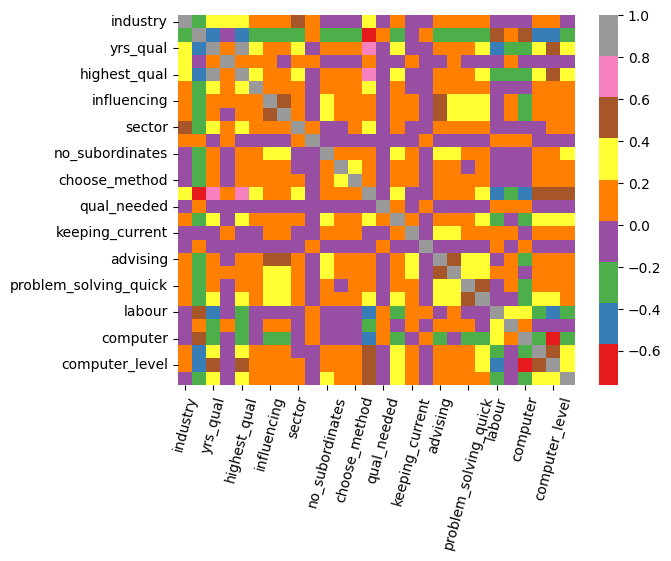

<Figure size 1400x1200 with 0 Axes>

In [26]:
#### -- generate a correlation matrix -- #
corr_matrix = data1.corr()

# -- plot the correlation matrix using Seaborn heatmap -- #
sns.heatmap(corr_matrix, annot=False, cmap='Set1')
plt.xticks(rotation=75)
plt.figure(figsize=(14,12))


In [27]:
corr_matrix

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
industry,1.000000,-0.321146,0.267895,0.316601,0.251091,0.095753,0.080255,0.038575,0.463423,0.075440,...,0.043499,0.079953,0.031806,0.049978,-0.138470,-0.073100,-0.117149,0.023343,0.115078,0.015451
occupation,-0.321146,1.000000,-0.525706,-0.154392,-0.521832,-0.294528,-0.282634,-0.236442,-0.212421,0.081548,...,-0.256815,-0.227219,-0.189816,-0.305730,0.416035,0.170375,0.447841,-0.387940,-0.550264,-0.312198
yrs_qual,0.267895,-0.525706,1.000000,0.021233,0.961458,0.298735,0.183163,0.133174,0.254924,-0.057306,...,0.153544,0.159544,0.130222,0.230247,-0.374080,-0.212017,-0.347065,0.326355,0.463362,0.368091
sex,0.316601,-0.154392,0.021233,1.000000,0.028555,0.027227,0.054772,0.004534,0.144806,0.062932,...,-0.030888,0.023860,-0.012494,-0.059138,-0.057841,0.077405,-0.058457,-0.035495,0.008363,-0.153411
highest_qual,0.251091,-0.521832,0.961458,0.028555,1.000000,0.349826,0.176035,0.135878,0.237957,-0.059202,...,0.155406,0.148058,0.143642,0.233388,-0.358263,-0.184937,-0.359267,0.326344,0.468505,0.337060
area_of_study,0.095753,-0.294528,0.298735,0.027227,0.349826,1.000000,0.027024,0.035666,0.039943,-0.005477,...,0.060989,0.027501,0.067769,0.095483,-0.104599,-0.063049,-0.163914,0.115467,0.181292,0.162682
influencing,0.080255,-0.282634,0.183163,0.054772,0.176035,0.027024,1.000000,0.570282,0.058408,-0.073382,...,0.478185,0.360297,0.239237,0.264055,-0.022070,0.025289,-0.179509,0.166184,0.170227,0.143268
negotiating,0.038575,-0.236442,0.133174,0.004534,0.135878,0.035666,0.570282,1.000000,0.055973,-0.087257,...,0.417347,0.298079,0.235548,0.303153,-0.010939,0.058250,-0.182408,0.188564,0.185095,0.137927
sector,0.463423,-0.212421,0.254924,0.144806,0.237957,0.039943,0.058408,0.055973,1.000000,0.048996,...,0.062649,0.130095,0.049315,0.079166,-0.077953,-0.064535,-0.119456,0.020324,0.125278,0.055561
workforce_change,0.075440,0.081548,-0.057306,0.062932,-0.059202,-0.005477,-0.073382,-0.087257,0.048996,1.000000,...,-0.077499,-0.068711,-0.069386,-0.101670,0.079234,0.028023,0.094445,-0.144354,-0.119591,-0.125781


In [67]:
data1.to_csv('salary_cleaned.csv', index=False)

In [28]:
# -- Function to check distribution -- #

def plot_distribution(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.distplot(df[column])
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


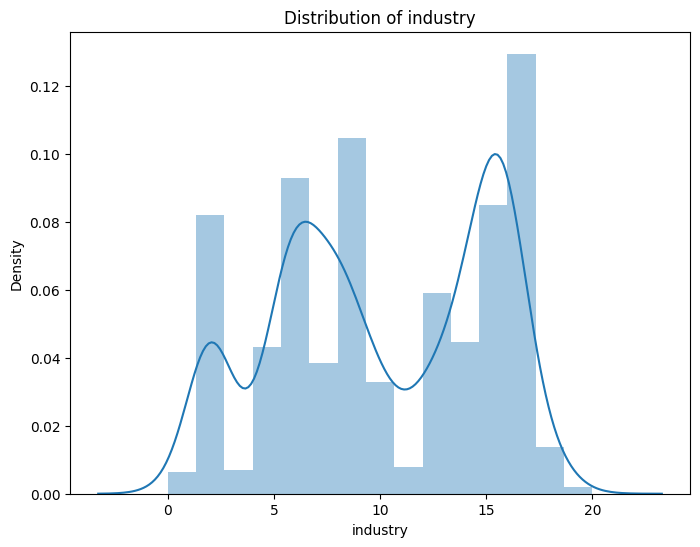

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


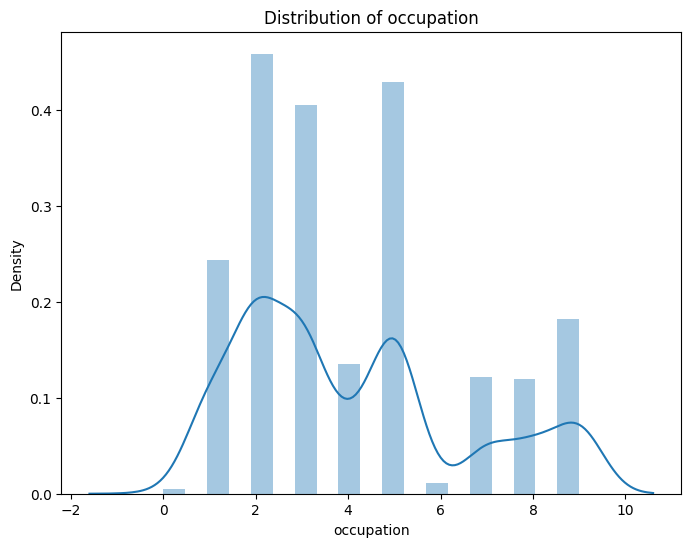

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


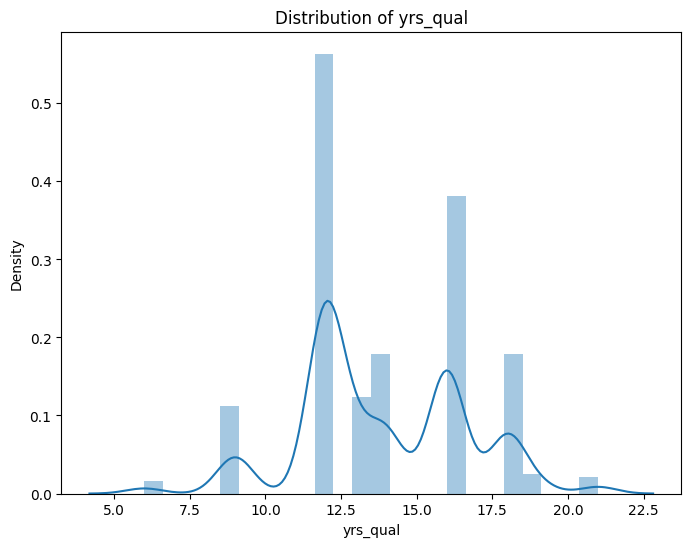

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


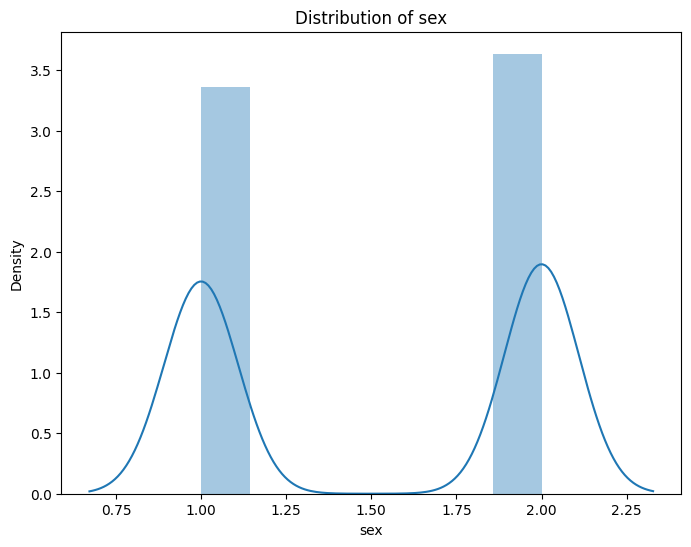

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


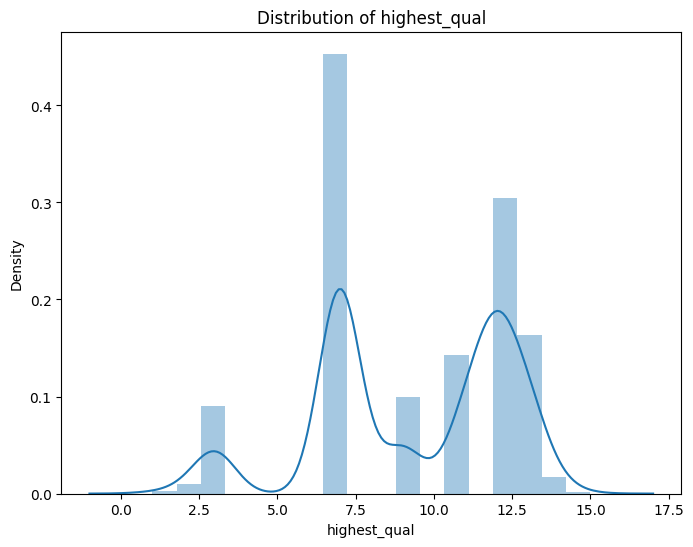

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


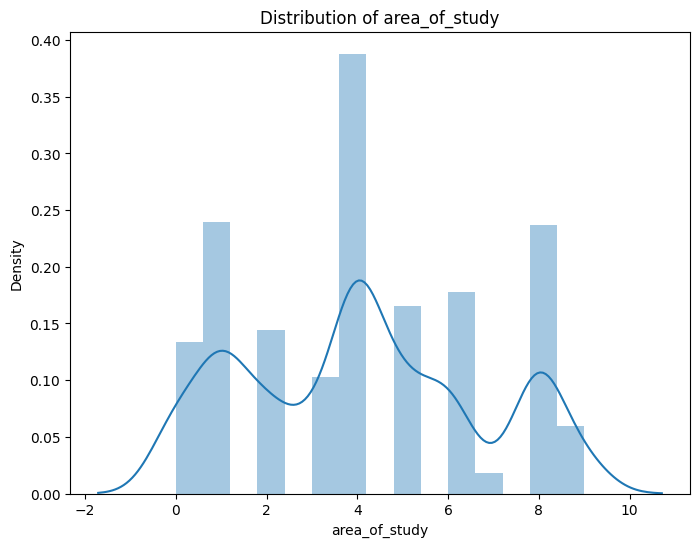

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


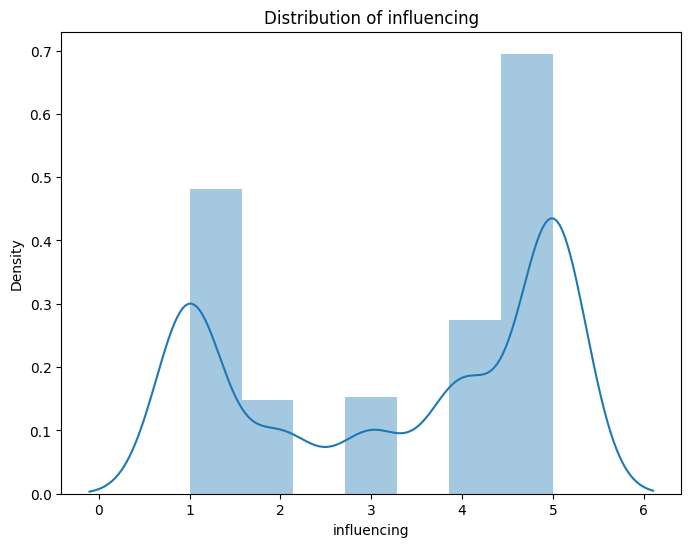

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


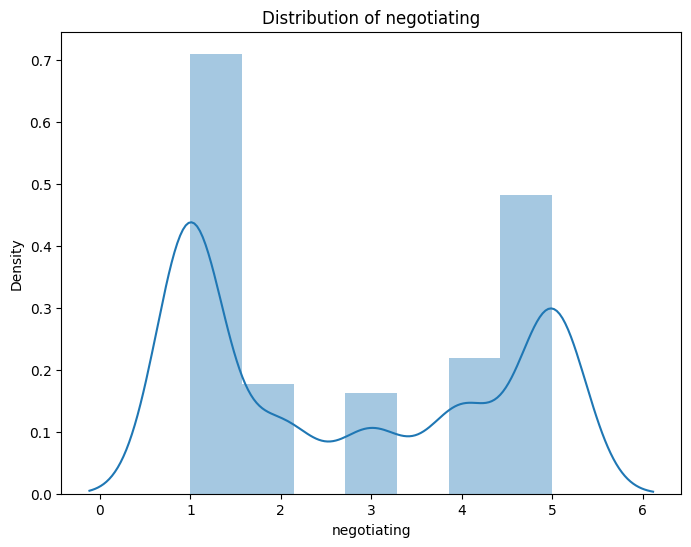

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


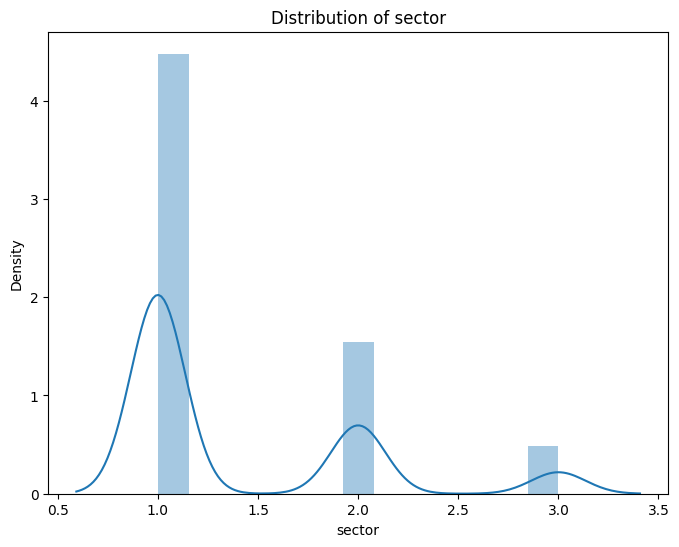

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


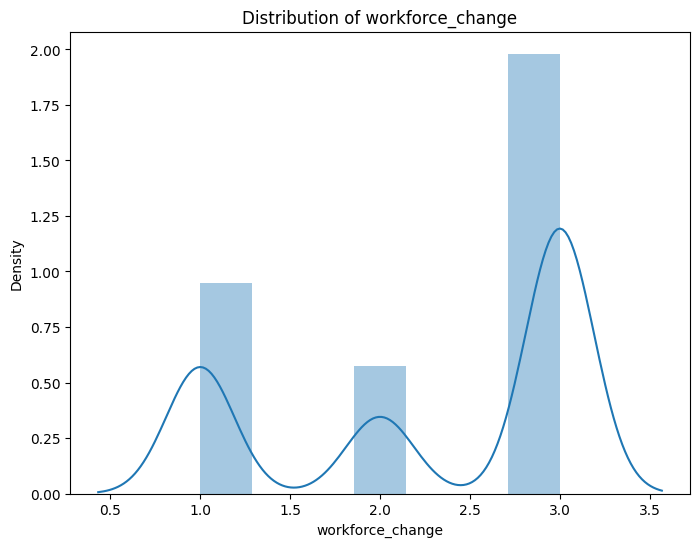

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


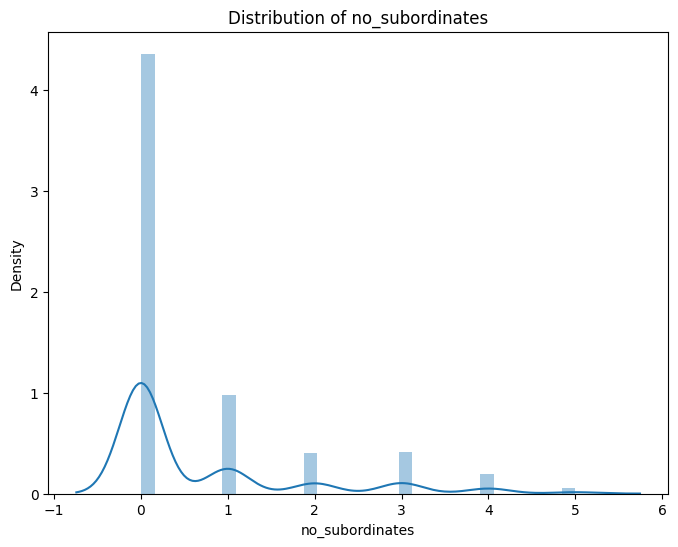

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


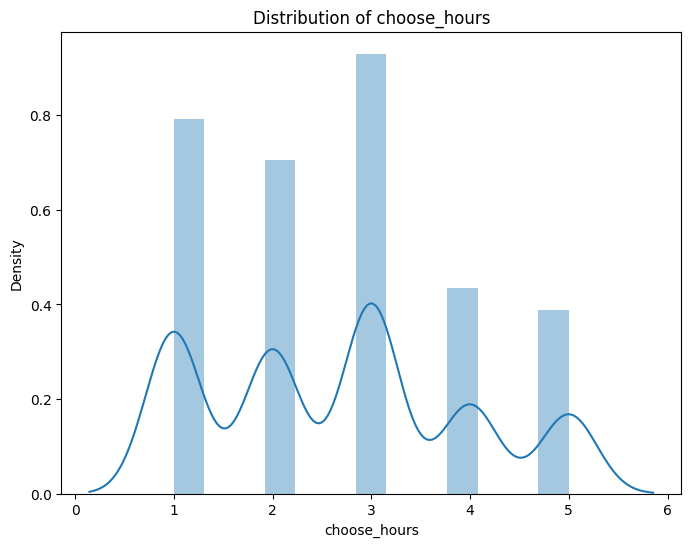

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


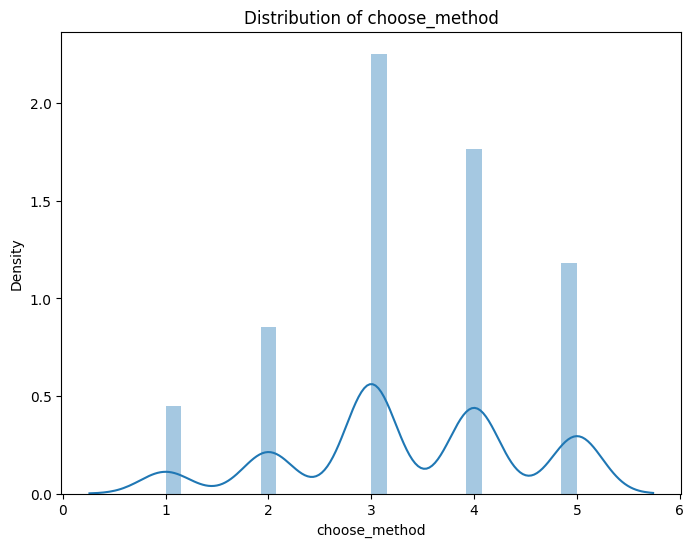

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


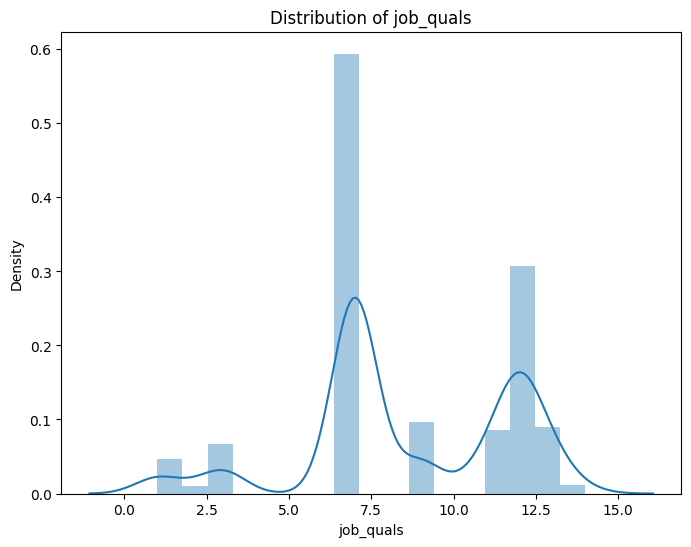

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


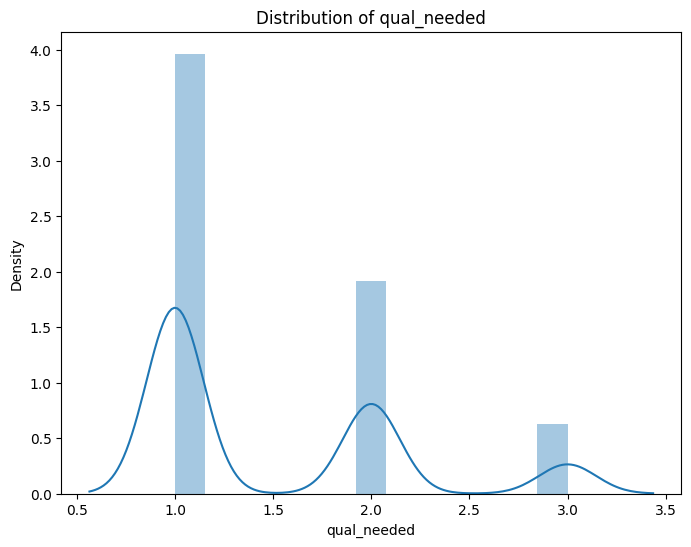

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


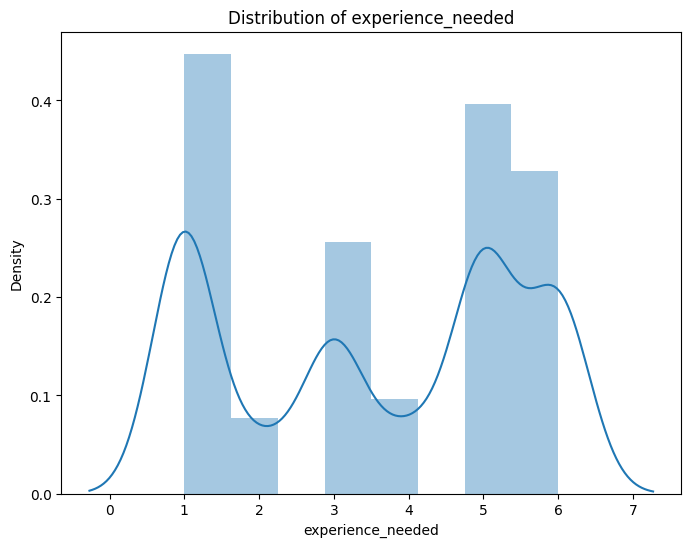

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


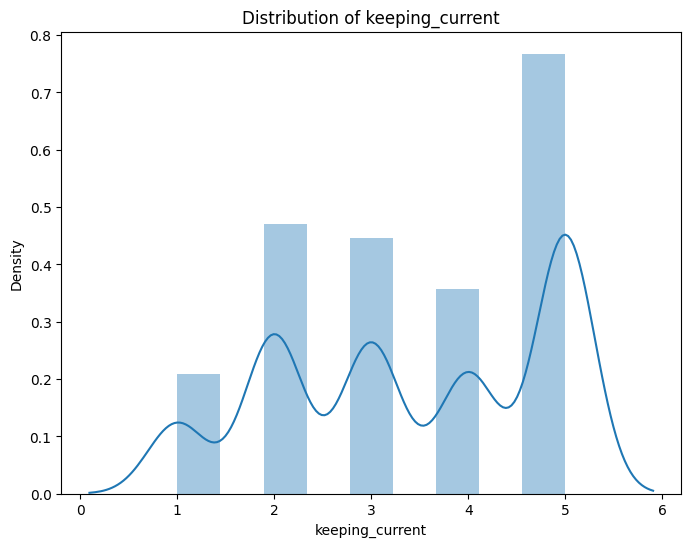

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


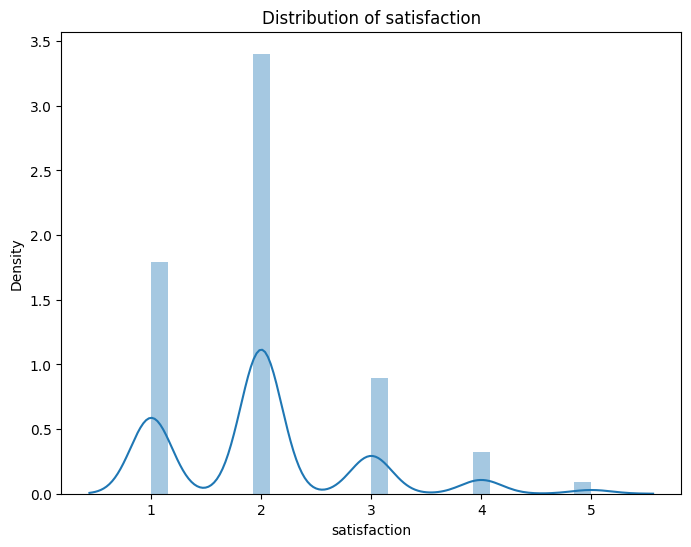

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


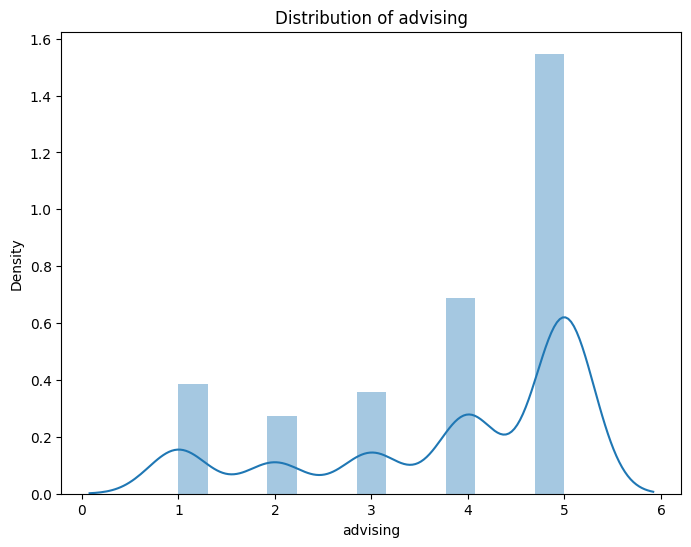

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


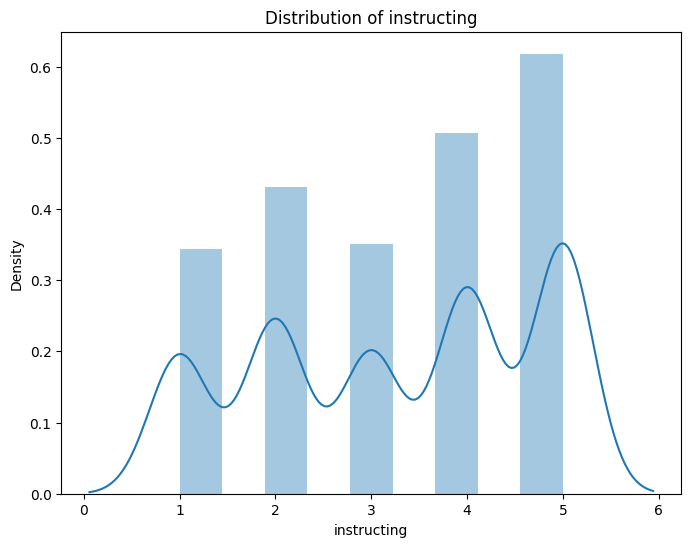

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


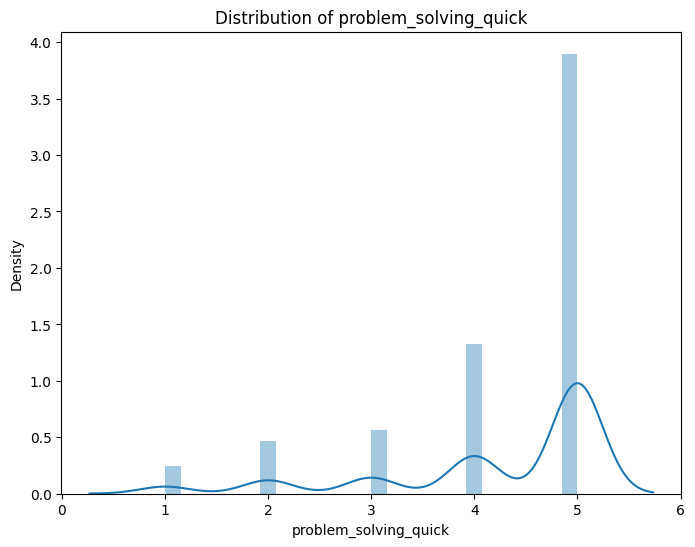

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


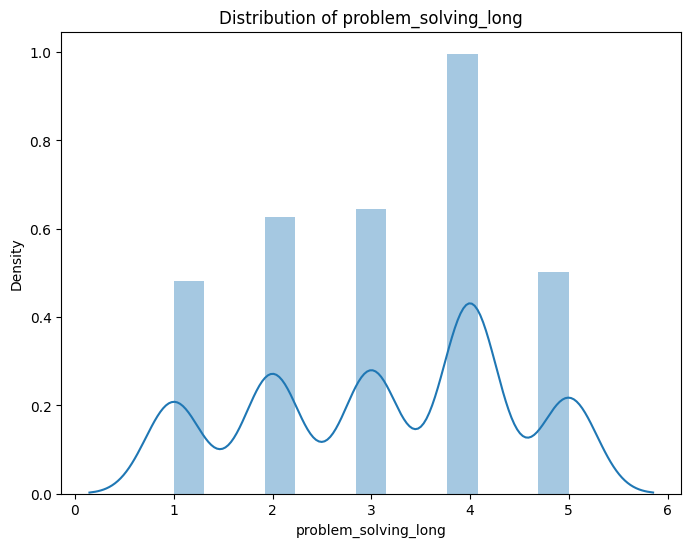

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


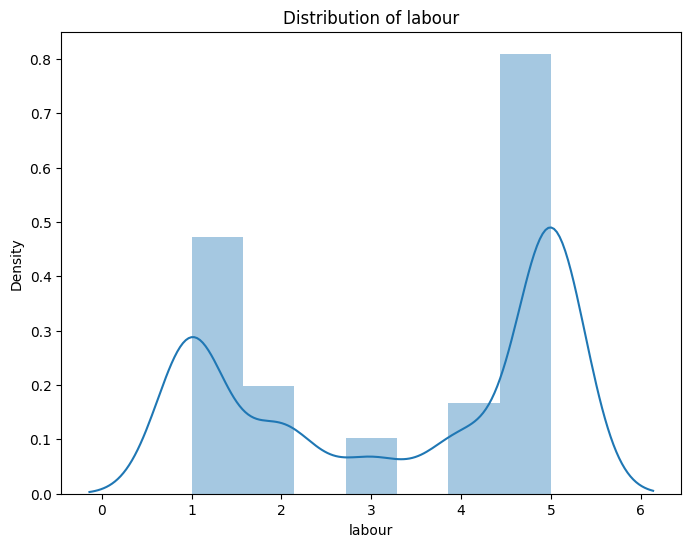

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


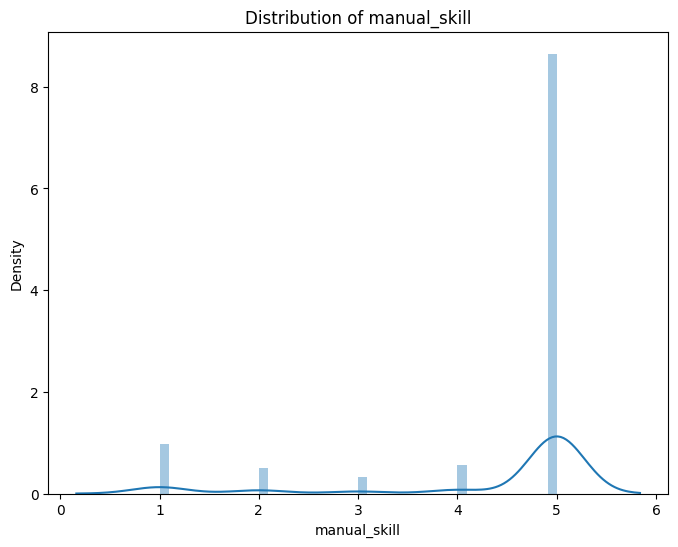

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


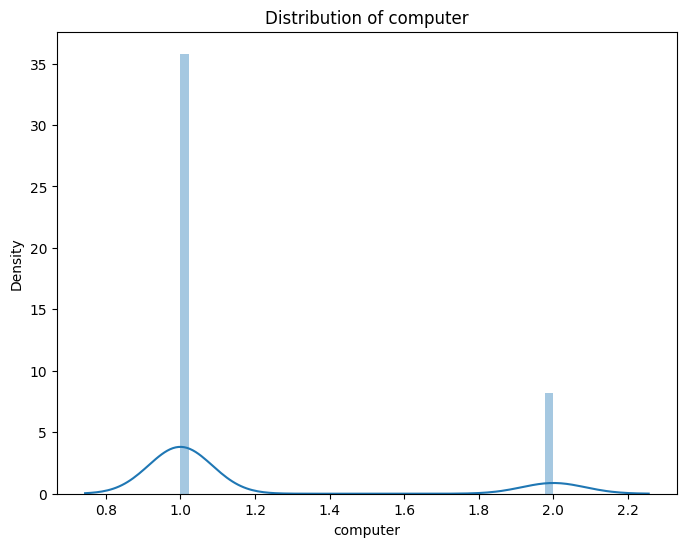

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


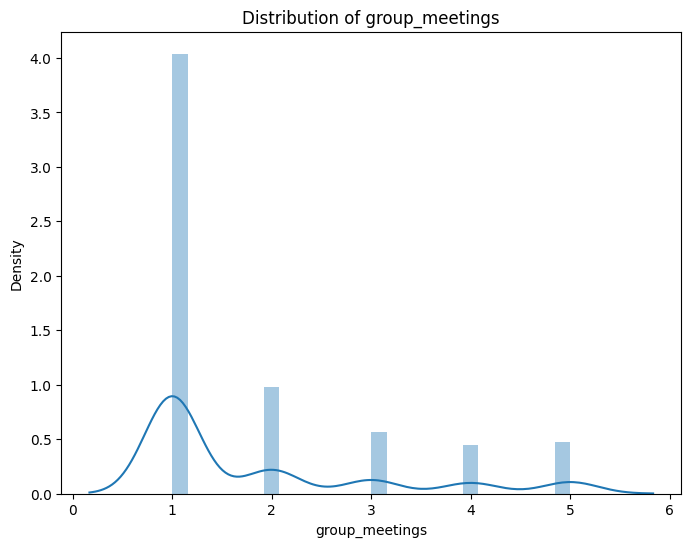

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


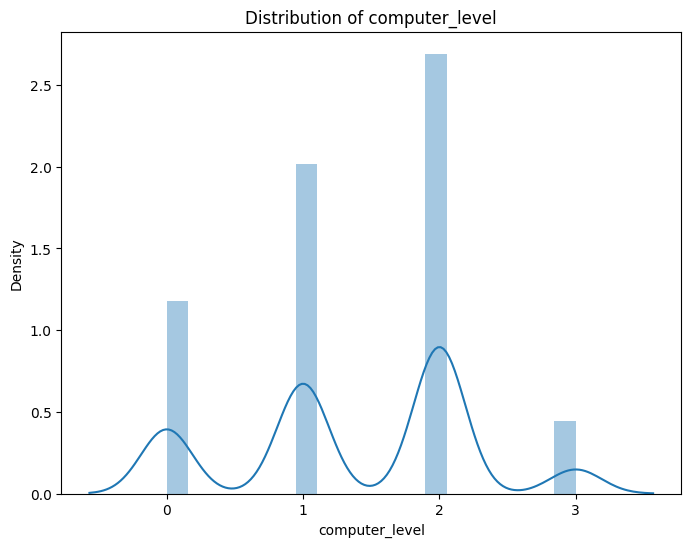

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\4199880539.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


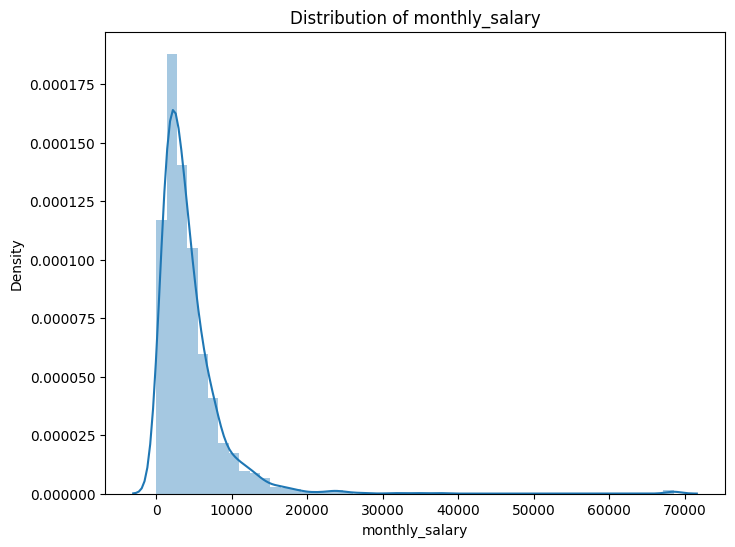

In [29]:
plot_distribution(data1)

In [59]:
X = data1.drop(['monthly_salary','industry'], axis=1)
y = data1['monthly_salary']

# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal')

transformer.fit(X_train)
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


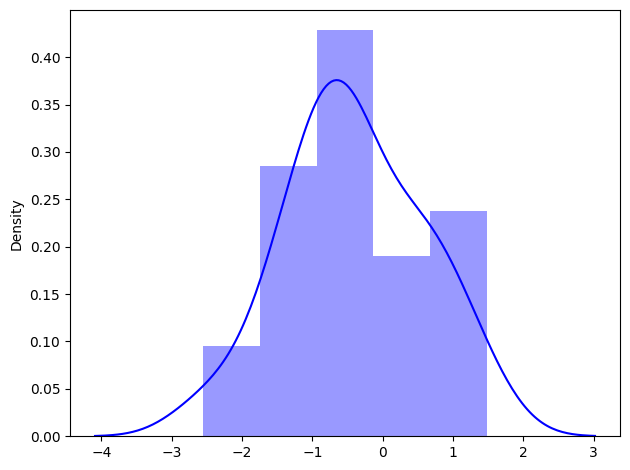

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


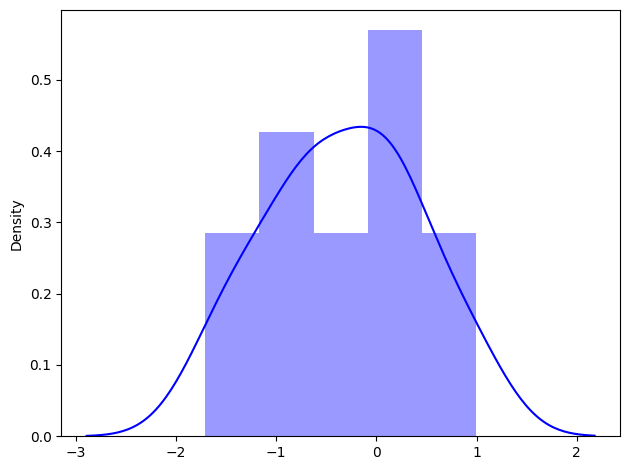

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


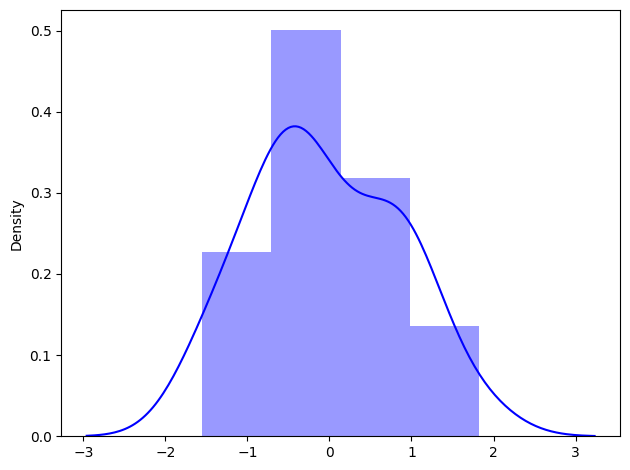

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


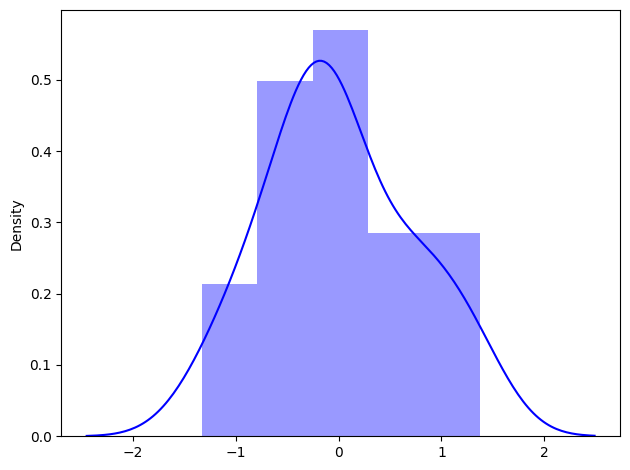

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


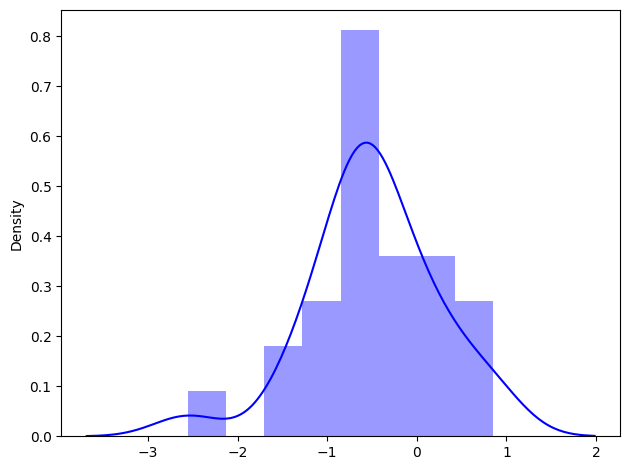

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


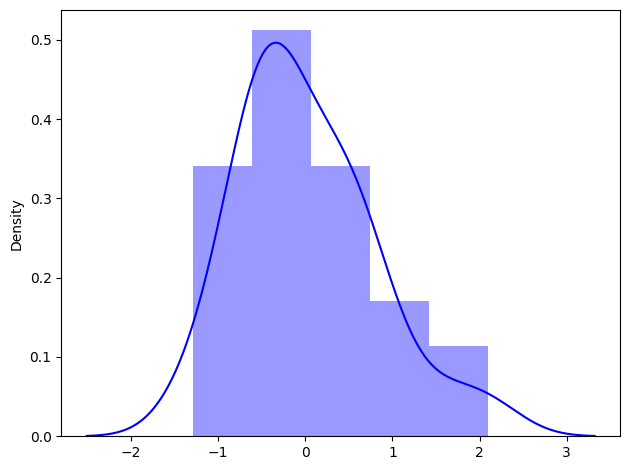

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


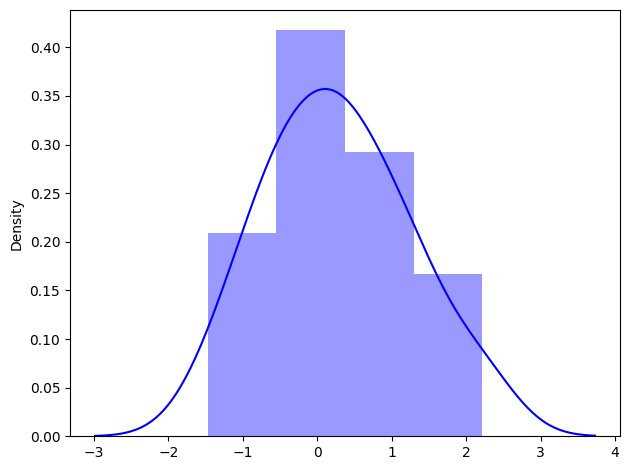

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


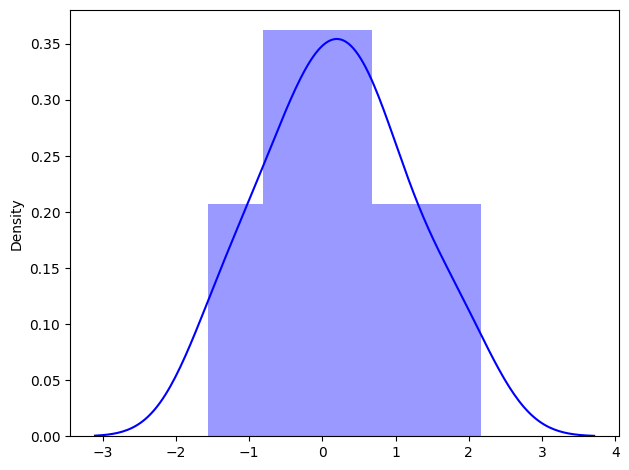

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


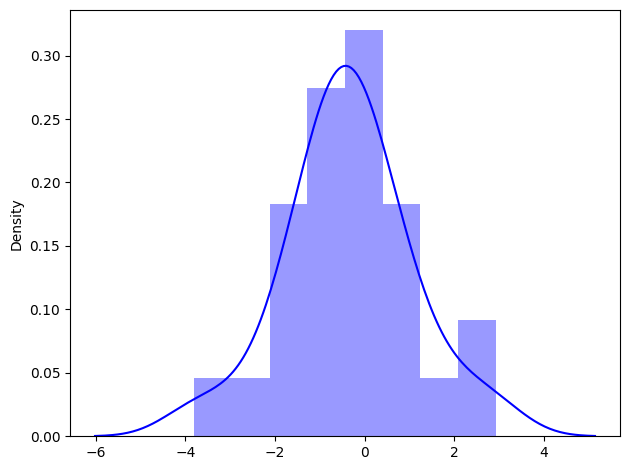

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


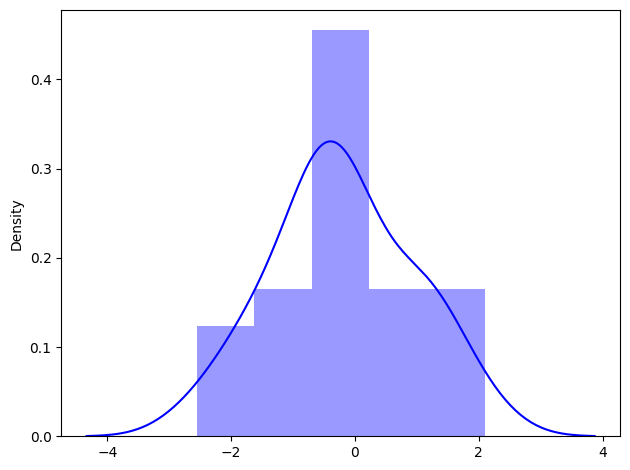

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


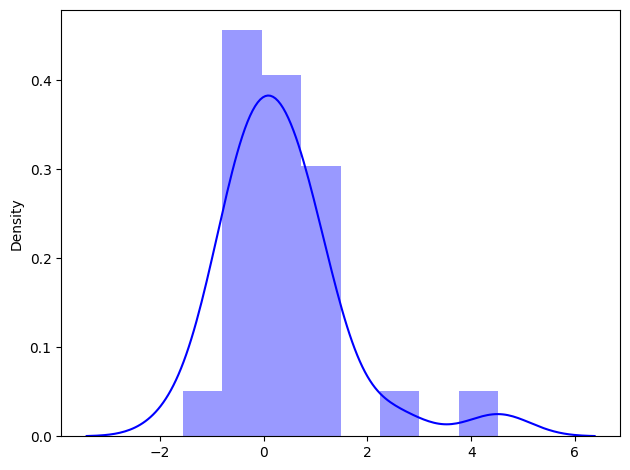

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


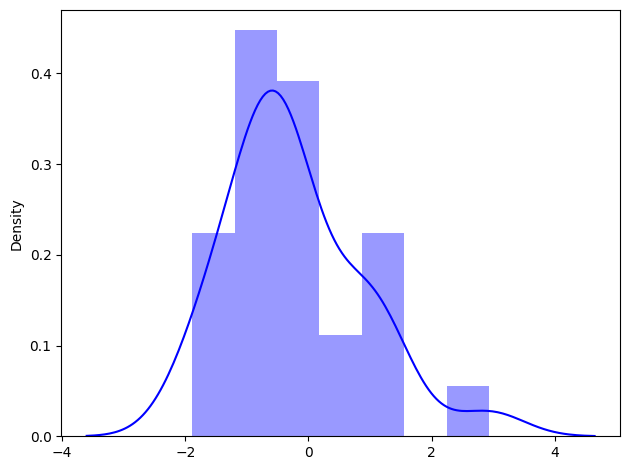

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


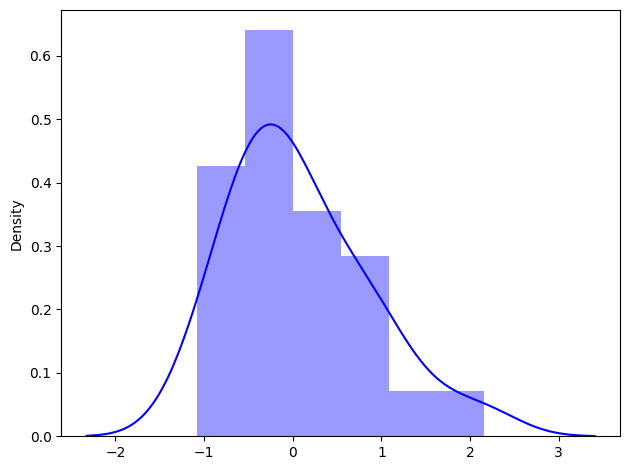

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


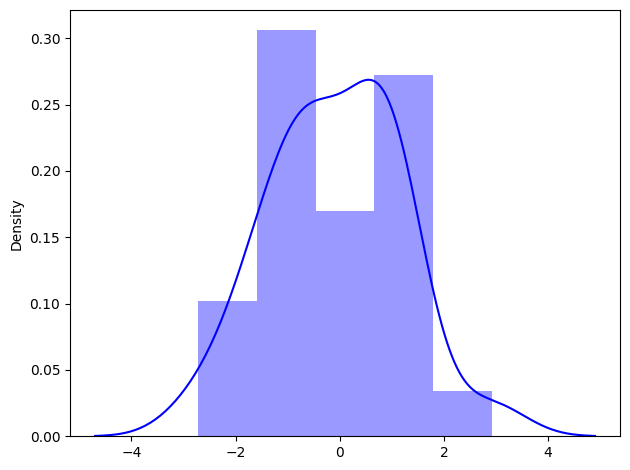

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


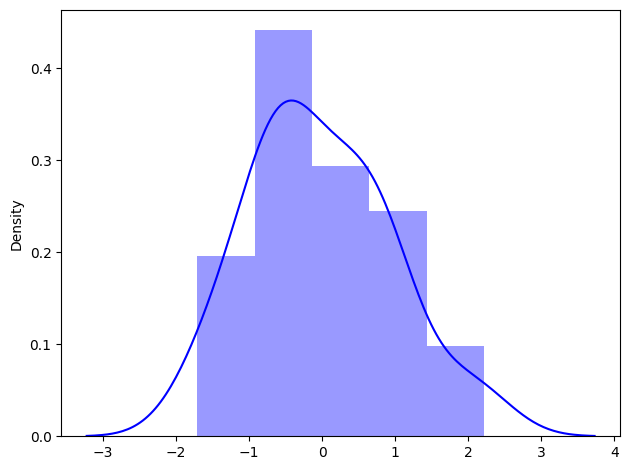

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


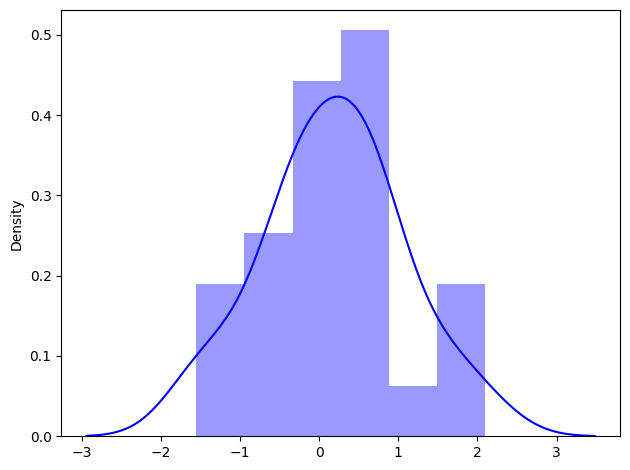

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


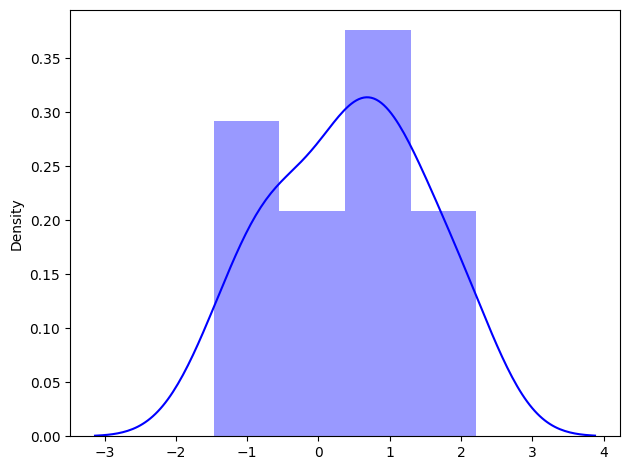

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


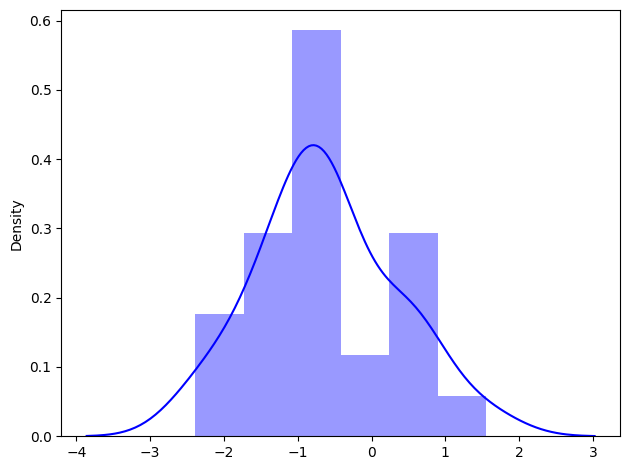

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


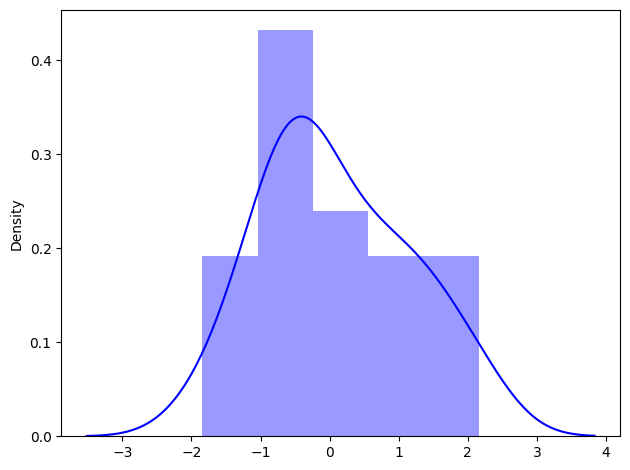

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


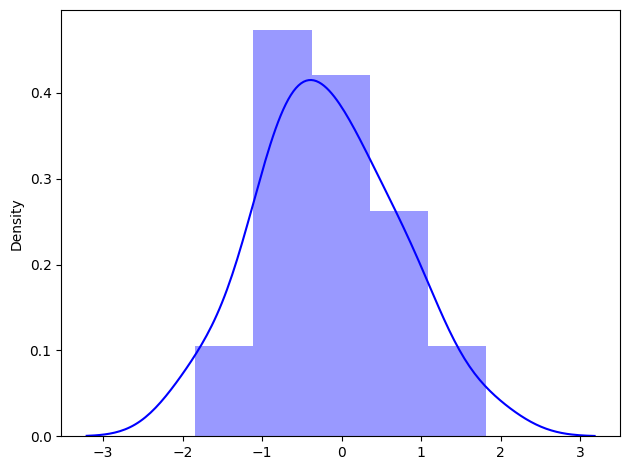

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


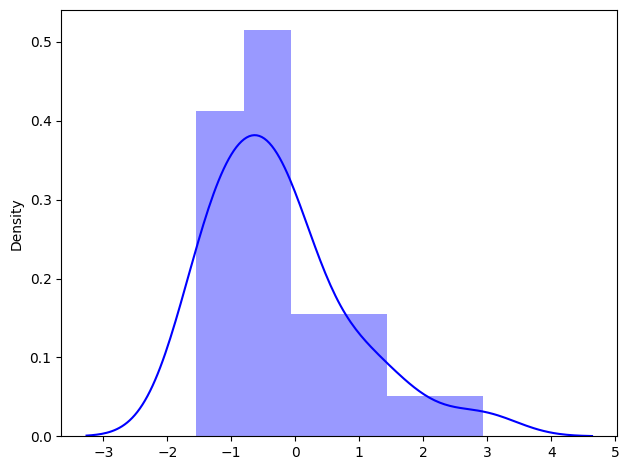

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


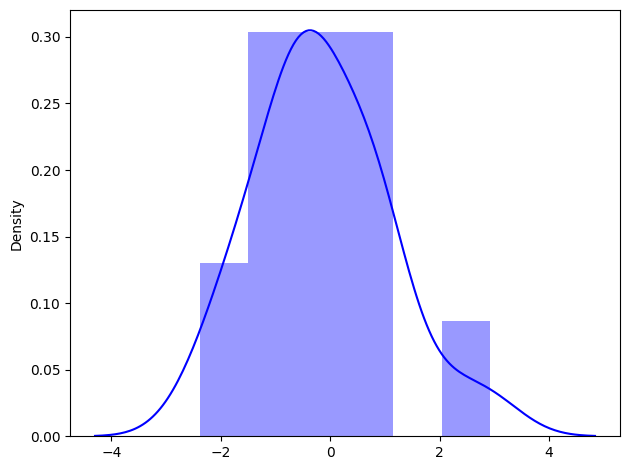

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


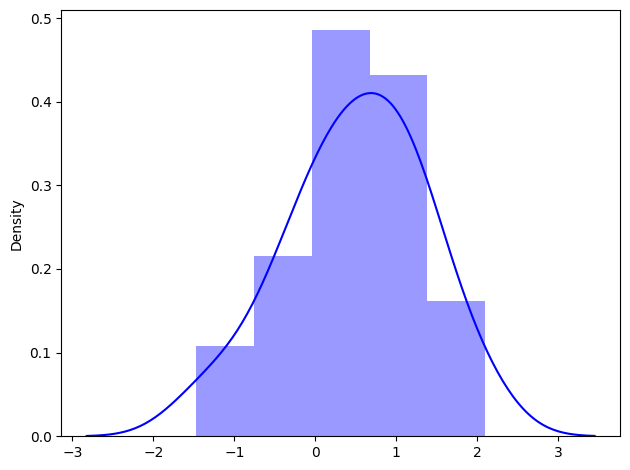

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


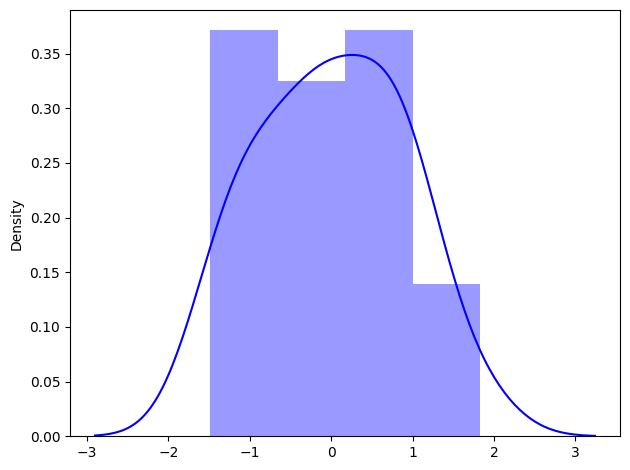

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


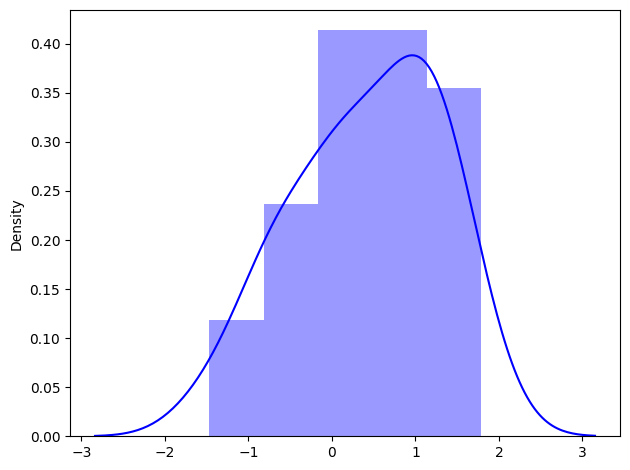

C:\Users\Home\AppData\Local\Temp\ipykernel_11468\1994033247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[column], color= 'blue')


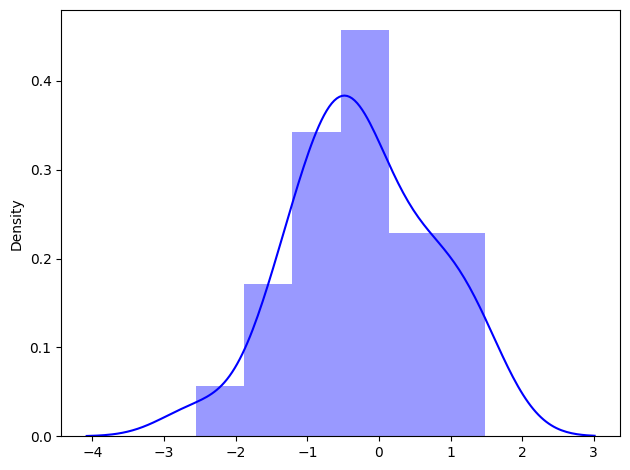

In [68]:
for column in range(X_train_scaled.shape[1]): 
  sns.distplot(X_train_scaled[column], color= 'blue')
  plt.tight_layout()
  plt.show()

In [65]:
# Save the transformer
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)